# Importation de libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import zscore
from sklearn.cluster import KMeans #importation de Kmeans
from sklearn.model_selection import train_test_split 
from collections import Counter
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz

ImportError: cannot import name 'plot_tree' from 'sklearn.tree' (C:\Users\Sarah\Anaconda3\lib\site-packages\sklearn\tree\__init__.py)

In [3]:
dataF = pd.read_csv("Data7.txt",sep="\t")

# Attribute selection

In [4]:
dataF.isna().sum()

Time                                                                                                             3
Country Name                                                                                                     5
GDP per capita, PPP (current international $)                                                                   27
Suicide mortality rate (per 100,000 population)                                                                 39
Renewable energy consumption (% of total final energy consumption)                                              11
Terrestrial and marine protected areas (% of total territorial area)                                           222
Forest area (% of land area)                                                                                    13
Total natural resources rents (% of GDP)                                                                        19
Life expectancy at birth, total (years)                                         

In [5]:
dataF = dataF.drop(['Time',
                    'Terrestrial and marine protected areas (% of total territorial area)',
                    'Mortality rate attributed to household and ambient air pollution, age-standardized (per 100,000 population)',
                    'Military expenditure (% of GDP)','Armed forces personnel, total',
                    'Maternal mortality ratio (national estimate, per 100,000 live births)',
                    'Refugee population by country or territory of asylum'], axis = 1)

# Object selection

In [6]:
dataF=dataF.dropna(axis=0)
dataF = dataF.reset_index(drop=True) # to regenerate consecutive integer row names
dataF.head()

,Country Name,"GDP per capita, PPP (current international $)","Suicide mortality rate (per 100,000 population)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Total natural resources rents (% of GDP),"Life expectancy at birth, total (years)","Probability of dying at age 5-14 years (per 1,000 children age 5)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Fertility rate, total (births per woman)","Birth rate, crude (per 1,000 people)",Refugee population by country or territory of origin,International migrant stock (% of population),CO2 emissions (kt),Methane emissions (kt of CO2 equivalent)
0,Afghanistan,1637.377987,5.1,14.839806,2.067825,0.588007,61.028,10.0,65.245592,5.977,39.829,3054709.0,0.365658,8463.436,13493.3000
1,Albania,9628.025783,7.8,37.115330,28.332116,2.033753,76.562,2.6,21.277828,1.660,12.001,14772.0,1.818957,4598.418,2592.3700
2,Algeria,12655.137410,3.3,0.258072,0.805294,26.917567,74.938,4.3,33.635820,2.860,24.504,6689.0,0.679773,119177.500,47575.5000
3,Angola,6230.297028,5.7,54.193837,46.907837,39.003947,55.350,24.6,33.787247,6.194,45.656,134858.0,0.360741,29057.308,18602.4000
4,Antigua and Barbuda,20134.817247,0.3,0.000000,22.272728,0.000000,75.823,2.0,22.528876,1.988,16.547,30.0,30.277533,524.381,42.4249


In [7]:
corr=dataF.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,"GDP per capita, PPP (current international $)","Suicide mortality rate (per 100,000 population)",Renewable energy consumption (% of total final energy consumption),Forest area (% of land area),Total natural resources rents (% of GDP),"Life expectancy at birth, total (years)","Probability of dying at age 5-14 years (per 1,000 children age 5)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Fertility rate, total (births per woman)","Birth rate, crude (per 1,000 people)",Refugee population by country or territory of origin,International migrant stock (% of population),CO2 emissions (kt),Methane emissions (kt of CO2 equivalent)
"GDP per capita, PPP (current international $)",1,0.14,-0.5,-0.073,0.07,0.61,-0.34,-0.12,-0.51,-0.57,-0.11,0.73,0.1,0.0082
"Suicide mortality rate (per 100,000 population)",0.14,1,-0.14,0.15,-0.15,0.13,-0.11,-0.21,-0.33,-0.36,-0.083,-0.058,0.12,0.11
Renewable energy consumption (% of total final energy consumption),-0.5,-0.14,1,0.2,0.038,-0.67,0.52,0.15,0.67,0.67,-0.013,-0.36,-0.15,-0.082
Forest area (% of land area),-0.073,0.15,0.2,1,-0.035,0.0019,-0.074,-0.31,-0.046,-0.054,-0.11,-0.2,-0.026,-0.027
Total natural resources rents (% of GDP),0.07,-0.15,0.038,-0.035,1,-0.3,0.12,0.34,0.36,0.38,0.069,0.14,-0.048,-0.024
"Life expectancy at birth, total (years)",0.61,0.13,-0.67,0.0019,-0.3,1,-0.57,-0.31,-0.82,-0.86,-0.11,0.36,0.13,0.061
"Probability of dying at age 5-14 years (per 1,000 children age 5)",-0.34,-0.11,0.52,-0.074,0.12,-0.57,1,0.15,0.55,0.54,0.034,-0.21,-0.084,-0.058
"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",-0.12,-0.21,0.15,-0.31,0.34,-0.31,0.15,1,0.31,0.34,0.27,0.087,0.13,0.23
"Fertility rate, total (births per woman)",-0.51,-0.33,0.67,-0.046,0.36,-0.82,0.55,0.31,1,0.98,0.2,-0.27,-0.16,-0.12
"Birth rate, crude (per 1,000 people)",-0.57,-0.36,0.67,-0.054,0.38,-0.86,0.54,0.34,0.98,1,0.17,-0.31,-0.17,-0.13


# Problematique ?
Est-ce que les pays qui attirent le plus de migrants sont ceux qui ont des conditions environnementales favorables (faible PM2.5 et grandes zones forestières) ou ceux où la participation dans le travail et plus forte? Est-ce que le niveau de vie joue - t-il un rôle important au moment de choisir un pays où immigrer (population growth, suicide mortality rate)

In [8]:
mycolumns=['GDP per capita, PPP (current international $)',
           'Forest area (% of land area)','Renewable energy consumption (% of total final energy consumption)',
           'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
           'CO2 emissions (kt)','Total natural resources rents (% of GDP)','Life expectancy at birth, total (years)']

In [9]:
dataF2=dataF[mycolumns]

In [10]:
corr2=dataF2.corr()
corr2.style.background_gradient(cmap='coolwarm').set_precision(2)

,"GDP per capita, PPP (current international $)",Forest area (% of land area),Renewable energy consumption (% of total final energy consumption),"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",CO2 emissions (kt),Total natural resources rents (% of GDP),"Life expectancy at birth, total (years)"
"GDP per capita, PPP (current international $)",1,-0.073,-0.5,-0.12,0.1,0.07,0.61
Forest area (% of land area),-0.073,1,0.2,-0.31,-0.026,-0.035,0.0019
Renewable energy consumption (% of total final energy consumption),-0.5,0.2,1,0.15,-0.15,0.038,-0.67
"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",-0.12,-0.31,0.15,1,0.13,0.34,-0.31
CO2 emissions (kt),0.1,-0.026,-0.15,0.13,1,-0.048,0.13
Total natural resources rents (% of GDP),0.07,-0.035,0.038,0.34,-0.048,1,-0.3
"Life expectancy at birth, total (years)",0.61,0.0019,-0.67,-0.31,0.13,-0.3,1


In [11]:
dataF2.rename(columns = {'GDP per capita, PPP (current international $)': 'GDP',
                         'Forest area (% of land area)':'Forest area',
                         'Total natural resources rents (% of GDP)':'Total natural resources rents',
                         'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)':'PM2.5 air pollution',
                         'CO2 emissions (kt)':'CO2 emissions',
                        'Renewable energy consumption (% of total final energy consumption)':'Renewable energy consumption',
                        'Life expectancy at birth, total (years)':'Life expectancy at birth, total'}, inplace=True)
dataF2.head()

C:\Users\Sarah\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,GDP,Forest area,Renewable energy consumption,PM2.5 air pollution,CO2 emissions,Total natural resources rents,"Life expectancy at birth, total"
0,1637.377987,2.067825,14.839806,65.245592,8463.436,0.588007,61.028
1,9628.025783,28.332116,37.115330,21.277828,4598.418,2.033753,76.562
2,12655.137410,0.805294,0.258072,33.635820,119177.500,26.917567,74.938
3,6230.297028,46.907837,54.193837,33.787247,29057.308,39.003947,55.350
4,20134.817247,22.272728,0.000000,22.528876,524.381,0.000000,75.823


## Nouvelle variable, definition des classes d'objets 

In [12]:
med=np.median(dataF2['Life expectancy at birth, total'])

In [13]:
#n, bins, patches=plt.hist(dataF2['Life expectancy at birth, total'],bins=[45,63,72,76,83])

In [14]:
#n,sum(n)

In [15]:
#bins

In [16]:
pourcentage=[]
for i in range(len(dataF2)):
    if dataF2['Life expectancy at birth, total'][i]<med:
        pourcentage.append('low')
    elif dataF2['Life expectancy at birth, total'][i]>=med:
        pourcentage.append('hight')
dataF2['Life expectancy at birth, total']=pourcentage

C:\Users\Sarah\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


pourcentage=[]
for i in range(len(dataF2)):
    if dataF2['Life expectancy at birth, total'][i]>=45 and dataF2['Life expectancy at birth, total'][i]<63 :
        pourcentage.append('45-63')
    elif dataF2['Life expectancy at birth, total'][i]>=63 and dataF2['Life expectancy at birth, total'][i]<72 :
        pourcentage.append('63-72')
    elif dataF2['Life expectancy at birth, total'][i]>=72 and dataF2['Life expectancy at birth, total'][i]<76 :
        pourcentage.append('72-76')
    elif dataF2['Life expectancy at birth, total'][i]>=76 and dataF2['Life expectancy at birth, total'][i]<83 :
        pourcentage.append('76-83')
        
dataF2['Life expectancy at birth, total']=pourcentage

In [18]:
dataF2.head()

,GDP,Forest area,Renewable energy consumption,PM2.5 air pollution,CO2 emissions,Total natural resources rents,"Life expectancy at birth, total"
0,1637.377987,2.067825,14.839806,65.245592,8463.436,0.588007,low
1,9628.025783,28.332116,37.115330,21.277828,4598.418,2.033753,hight
2,12655.137410,0.805294,0.258072,33.635820,119177.500,26.917567,hight
3,6230.297028,46.907837,54.193837,33.787247,29057.308,39.003947,low
4,20134.817247,22.272728,0.000000,22.528876,524.381,0.000000,hight


# Visualisation des données

In [19]:
dataF3=dataF2

In [20]:
dataF3.describe(include='all')

,GDP,Forest area,Renewable energy consumption,PM2.5 air pollution,CO2 emissions,Total natural resources rents,"Life expectancy at birth, total"
count,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000,174
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,hight
freq,NaN,NaN,NaN,NaN,NaN,NaN,87
mean,16100.394404,31.769154,33.617889,29.112650,1.803082e+05,9.235423,NaN
std,17510.275230,23.224987,30.098870,17.243744,8.039393e+05,12.510526,NaN
min,646.295395,0.000000,0.000000,7.152866,6.233900e+01,0.000000,NaN
25%,3420.525795,11.657300,7.656136,17.285109,2.437638e+03,0.904782,NaN
50%,9811.045521,31.189832,24.837116,25.996765,1.191958e+04,3.150320,NaN
75%,20937.548169,49.328454,54.577321,34.289539,7.244342e+04,12.279648,NaN


### Normlaisation des données

Pour déterminer des groupes de vins qui se ressemblent, on commence par normaliser les données car nos
variables ont des unités très différentes. Cette étape permet de donner le même poids à chaque variable (pour
que les variables ayant des valeurs plus grandes n’aient pas une influence disproportionnée).

In [21]:
cols =list(dataF3.columns)
cols.remove('Life expectancy at birth, total') 

In [22]:
dataF3[cols]=dataF3[cols].apply(zscore,axis=0)

C:\Users\Sarah\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [23]:
dataF3.describe()

,GDP,Forest area,Renewable energy consumption,PM2.5 air pollution,CO2 emissions,Total natural resources rents
count,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02,1.740000e+02
mean,5.806339e-17,-1.843991e-16,-1.556864e-16,-5.710630e-17,6.540107e-18,-1.547294e-17
std,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00,1.002886e+00
min,-8.851203e-01,-1.371835e+00,-1.120139e+00,-1.277168e+00,-2.248504e-01,-7.403427e-01
25%,-7.262286e-01,-8.684567e-01,-8.650384e-01,-6.878828e-01,-2.218873e-01,-6.678123e-01
50%,-3.602171e-01,-2.501589e-02,-2.925729e-01,-1.812180e-01,-2.100589e-01,-4.878024e-01
75%,2.770438e-01,7.582341e-01,6.983625e-01,3.010849e-01,-1.345575e-01,2.440354e-01
max,5.808647e+00,2.877375e+00,2.106137e+00,4.168389e+00,1.072287e+01,3.614905e+00


In [24]:
dataF3.head()

,GDP,Forest area,Renewable energy consumption,PM2.5 air pollution,CO2 emissions,Total natural resources rents,"Life expectancy at birth, total"
0,-0.828357,-1.282543,-0.625681,2.101471,-0.214370,-0.693206,low
1,-0.370699,-0.148416,0.116534,-0.455669,-0.219192,-0.577310,hight
2,-0.197324,-1.337061,-1.111540,0.263065,-0.076258,1.417460,hight
3,-0.565301,0.653709,0.685585,0.271872,-0.188680,2.386345,low
4,0.231068,-0.410068,-1.120139,-0.382908,-0.224274,-0.740343,hight


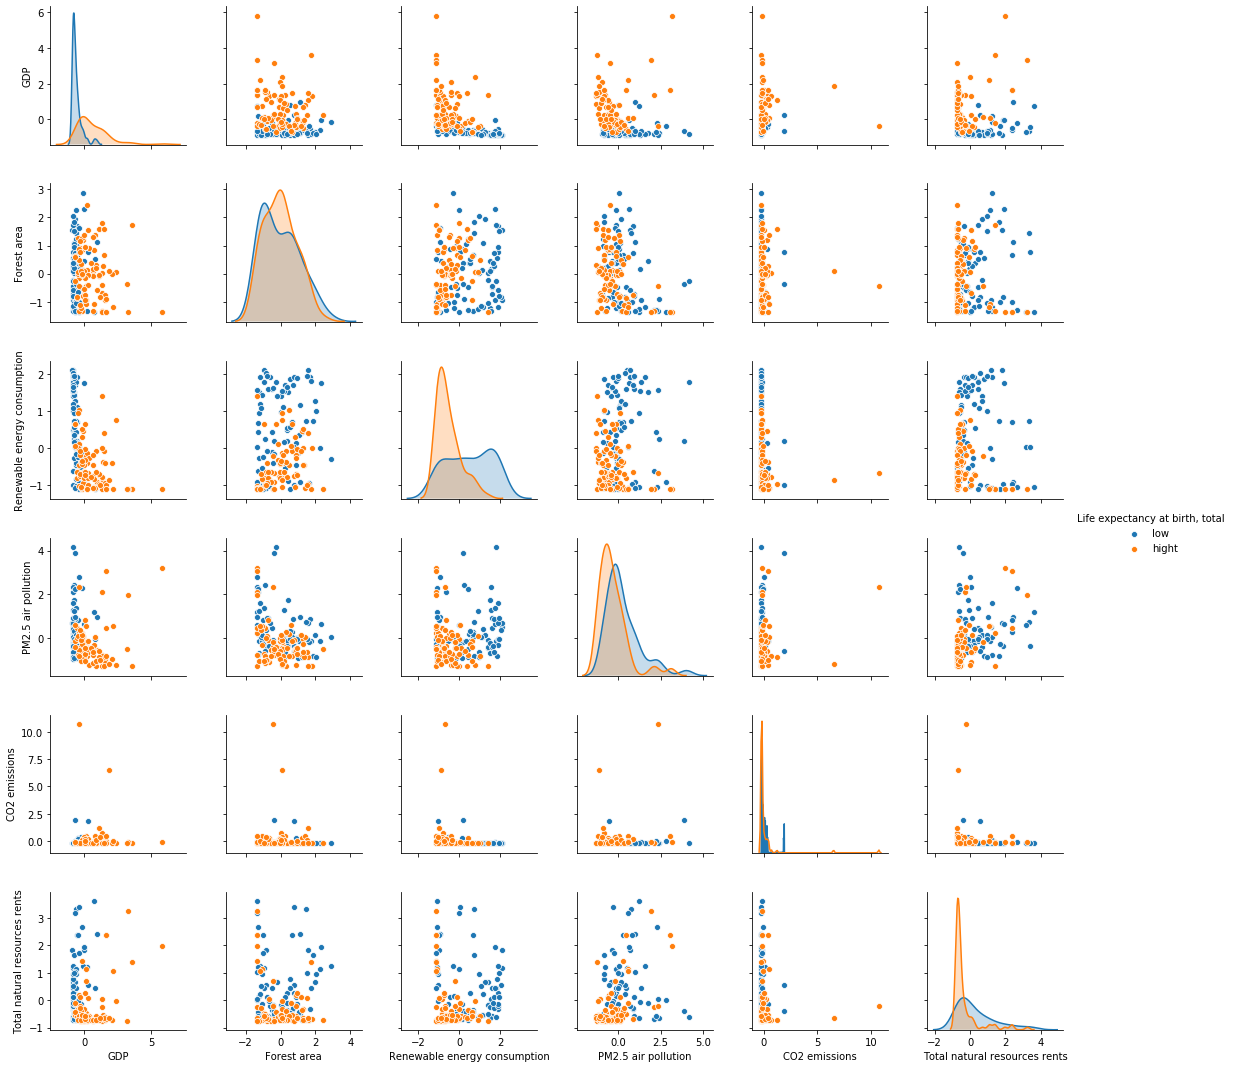

In [21]:
sns.pairplot(data=dataF3, hue='Life expectancy at birth, total')

## Identification des outliers (?)

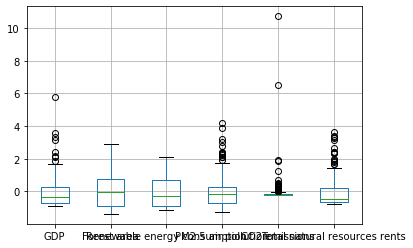

In [22]:
dataF3.boxplot()

# Recherche de clusters
On réalise un clustering hiérarchique en méthode single avec distance euclidienne sur notre jeu
de données. Nous cherchons ici à déterminer des clusters de type contour. Cette représentation nous permet
aussi de prendre une décision quant à nos outliers.

## Kmeans 
Nous cherchons des clusters sphériques grâce à la méthode des k-means.
Afin de déterminer le nombre de groupes que l’on va créer, on fait varier le nombre de groupes dans notre
k-means puis on calcule la SSE totale de notre clustering. Le nombre de groupes que l’on retient est
celui qui donne une SSE suffisamment faible avec un nombre de groupes suffisamment petit.

In [25]:
classes = dataF3['Life expectancy at birth, total']
objects = dataF3.drop(['Life expectancy at birth, total'],axis=1)

In [26]:
# Get SSE when varying the number of clusters
sse_list = []
k_list = range(2,11)
for i in k_list:
    km_i_clusters=KMeans(n_clusters=i)
    km_i_clusters.fit(objects)
    sse_list = sse_list + [km_i_clusters.inertia_]
print(sse_list)

[843.5129310784861, 688.0297946672817, 542.7550674901422, 468.599758541621, 417.51328973564443, 369.07419200025106, 329.741691665791, 296.3643581102889, 263.8547924696808]


Text(0, 0.5, 'SSE')

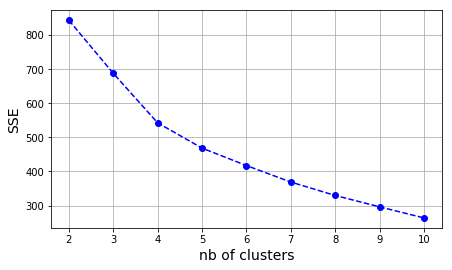

In [27]:
fig = plt.figure(figsize=(7, 4))
plt.plot(k_list,sse_list,'bo--')
plt.grid()
plt.xlabel("nb of clusters",fontsize=14)
plt.ylabel("SSE",fontsize=14)

In [28]:
km=KMeans(n_clusters=4)
km.fit(objects) # compute the clusters --> lancer le kmeans
centroids=km.cluster_centers_

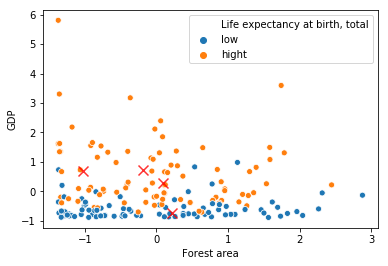

In [29]:
sns.scatterplot(data=dataF3, x="Forest area", y='GDP', hue='Life expectancy at birth, total')
# plot the centroids
sns.regplot(x=centroids[:,dataF3.columns.get_loc("Forest area")], y=centroids[:,dataF3.columns.get_loc("GDP")],
            scatter=True, fit_reg=False, marker='x', scatter_kws={"s": 100}, color="r")

### Étude de la stabilité de la convergence de K-means

## Hierarchical clustering (complete/single)

### Deandrograms for hierarchical clustering

## DBSCAN

# CLASSIFICATION

In [30]:
#X = dataF3.drop(['GDP'],axis=1)
#Y=dataF3['GDP']
X = dataF3.drop(['Life expectancy at birth, total'],axis=1)
Y=dataF3['Life expectancy at birth, total']

In [31]:
#On randomize la BD pour pouvoir avoir un jeu d'entrainement et un jeu test
#Random_state: on fixe la graine du générateur pseudo aléatoire
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=10)

In [32]:
#On vérifier la distribution 
Counter(Y_test)

Counter({'hight': 31, 'low': 27})

In [31]:
dt= tree.DecisionTreeClassifier() #constructeur de decision tree 

In [32]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
Y_predict=dt.predict(X_test)

## Confusion matrix

In [34]:
#lignes vrai classes des objets
#colonnes classes des predits 
pd.crosstab(Y_test,Y_predict)

col_0,hight,low
"Life expectancy at birth, total",,
hight,28,3
low,9,18


## Metrics

In [35]:
accuracy_score(Y_test,Y_predict)

0.7931034482758621

In [36]:
precision_score(Y_test,Y_predict,average="weighted"), precision_score(Y_test,Y_predict,average="macro")

(0.8034882172813208, 0.8069498069498069)

In [37]:
recall_score(Y_test,Y_predict,average="weighted"), recall_score(Y_test,Y_predict,average="macro")

(0.7931034482758621, 0.7849462365591398)

In [38]:
f1_score(Y_test,Y_predict,average="weighted"), f1_score(Y_test,Y_predict,average="macro")

(0.7893002028397567, 0.786764705882353)

In [39]:
print(classification_report(Y_test, Y_predict))

              precision    recall  f1-score   support

       hight       0.76      0.90      0.82        31
         low       0.86      0.67      0.75        27

    accuracy                           0.79        58
   macro avg       0.81      0.78      0.79        58
weighted avg       0.80      0.79      0.79        58



## Decision tree

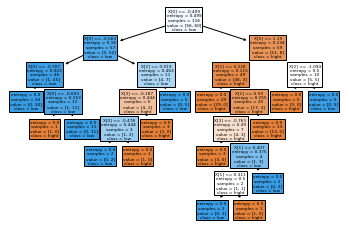

In [40]:

_=plot_tree(dt,filled=True,class_names=dt.classes_)

In [41]:
dot_data = export_graphviz(dt, out_file=None, 
                           feature_names=X.columns,
                           class_names=dt.classes_, 
                           filled=True, rounded=True) 
graph = graphviz.Source(dot_data)
graph
graph.render("out_iris_decision_tree")

'out_iris_decision_tree.pdf'

## Crossvalidation

In [42]:
from sklearn.model_selection import StratifiedKFold #cross-validation splitter
from sklearn.model_selection import cross_validate #cross-validation evaluation of metrics

__Metriques qu'on va évaluer__

In [44]:
scoring = ['accuracy',
           'precision_macro',
           'precision_weighted',
           'recall_macro',
           'recall_weighted',
           'f1_macro',
           'f1_weighted']

__stritfied crossvalidation__

In [45]:
cv1 = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)


In [47]:
scores1 = cross_validate(dt, X, Y, scoring=scoring,
                        cv=cv1, return_train_score=True)

In [49]:
pd.DataFrame(scores1).mean()

fit_time                    0.004017
score_time                  0.017797
test_accuracy               0.776144
train_accuracy              1.000000
test_precision_macro        0.788024
train_precision_macro       1.000000
test_precision_weighted     0.788024
train_precision_weighted    1.000000
test_recall_macro           0.776144
train_recall_macro          1.000000
test_recall_weighted        0.776144
train_recall_weighted       1.000000
test_f1_macro               0.773036
train_f1_macro              1.000000
test_f1_weighted            0.773036
train_f1_weighted           1.000000
dtype: float64

__Normal cross validation__

In [50]:
from sklearn.model_selection import KFold
cv2 = KFold(n_splits=5, shuffle=True)
scores2 = cross_validate(dt, X, Y, scoring=scoring,
                        cv=cv2, return_train_score=True)
pd.DataFrame(scores2).mean()

fit_time                    0.003449
score_time                  0.015462
test_accuracy               0.764706
train_accuracy              1.000000
test_precision_macro        0.776908
train_precision_macro       1.000000
test_precision_weighted     0.792494
train_precision_weighted    1.000000
test_recall_macro           0.776965
train_recall_macro          1.000000
test_recall_weighted        0.764706
train_recall_weighted       1.000000
test_f1_macro               0.762807
train_f1_macro              1.000000
test_f1_weighted            0.764462
train_f1_weighted           1.000000
dtype: float64

## Overfitting

In [53]:
from sklearn.tree import DecisionTreeClassifier
cv = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
results = {}
for leaves in range(2,40):
    dt = DecisionTreeClassifier(max_leaf_nodes=leaves,criterion="gini")
    local_results = cross_validate(dt, X, Y, scoring=["accuracy"],cv=cv, return_train_score=True)
    avg_local_results = pd.DataFrame(local_results).mean()
    results[leaves] = avg_local_results
results_df = pd.DataFrame(results)

No handles with labels found to put in legend.


Text(0, 0.5, 'Max Nb. Leaves')

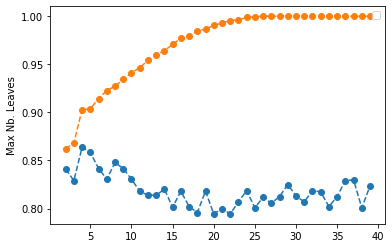

In [54]:
plt.plot(results_df.T.index , results_df.T["test_accuracy"],"o--")
plt.plot(results_df.T.index , results_df.T["train_accuracy"],"o--")
plt.legend()
plt.ylabel("Accuracy")
plt.ylabel("Max Nb. Leaves")

Il y a du sur apprentissage car on gagne sur le jeu d'entrainement mais pas sur le jeu de test